# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Для того, чтобы сохранить отправную точку для псевдогенератора. Это позволит получать те же самые результаты при новых запусках кода.

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


Посмотрим на данные:

In [ ]:
df_train.sample(3)

name  year  selling_price  km_driven  \
6565  Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                Maruti Wagon R LXI  2013         225000      58343   
2024              Hyundai i20 Asta 1.2  2013         360000      30000   

        fuel       seller_type transmission        owner     mileage   engine  \
6565  Petrol        Individual       Manual  First Owner  23.01 kmpl   999 CC   
2943  Petrol  Trustmark Dealer       Manual  First Owner  21.79 kmpl   998 CC   
2024  Petrol        Individual       Manual  First Owner   18.5 kmpl  1197 CC   

      max_power            torque  seats  
6565     67 bhp     91Nm@ 4250rpm    5.0  
2943  67.05 bhp     90Nm@ 3500rpm    5.0  
2024  82.85 bhp  113.7Nm@ 4000rpm    5.0

Для каждого объекта - машины представлены следующие признаки:  
1. `name` - название (бренд, модель)  
2. `year` - год выпуска  
3. `km_driven` - пробег  
4. `fuel` - тип двигателя  
5. `seller_type` - тип продавца  
6. `transmission` - трансмиссия  
7. `owner` - количество владельцев  
8. `mileage` - расход топлива  
9. `engine` - объем двигателя  
10. `max_power` - мощность двигателя
11. `torque` - крутящий момент
12. `seats` - количество мест  

### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

__Отобразите 10 случайных строк тренировочного датасета (0.15 балла):__

In [ ]:
df_train.sample(10)

name  year  selling_price  \
6973                 Tata Nexon 1.5 Revotorq XT  2018         800000   
2638                         Maruti Wagon R VXI  2006         135000   
4256                     Maruti Swift Dzire VDI  2019         675000   
5699                     Maruti Swift Dzire ZDI  2018         780000   
2629                Maruti Omni E MPI STD BS IV  2016         190000   
5512                         Tata Indica V2 LSi  2008          85000   
4885                         Tata Nano Twist XE  2015         110000   
1964                  Maruti Omni 8 Seater BSII  2010         130000   
2343  Ford EcoSport 1.5 Ti VCT AT Titanium BSIV  2015         775000   
5179                        Mahindra TUV 300 T8  2017         700000   

      km_driven    fuel seller_type transmission         owner     mileage  \
6973      85000  Diesel  Individual       Manual  Second Owner   21.5 kmpl   
2638      62900  Petrol  Individual       Manual   First Owner   18.9 kmpl   
4256      25000  Diesel  Individual       Manual   First Owner   28.4 kmpl   
5699      30000  Diesel  Individual       Manual   First Owner   28.4 kmpl   
2629      80000  Petrol  Individual       Manual  Second Owner   16.8 kmpl   
5512      25000  Petrol  Individual       Manual  Second Owner  16.84 kmpl   
4885      15000  Petrol  Individual       Manual   First Owner   25.4 kmpl   
1964     120000  Petrol  Individual       Manual   Third Owner   19.7 kmpl   
2343      30000  Petrol  Individual    Automatic   First Owner  15.63 kmpl   
5179      40000  Diesel  Individual       Manual   First Owner  18.49 kmpl   

       engine  max_power               torque  seats  
6973  1497 CC  108.5 bhp  260Nm@ 1500-2750rpm    5.0  
2638   998 CC   67.1 bhp        90Nm@ 3500rpm    5.0  
4256  1248 CC  74.02 bhp       190Nm@ 2000rpm    5.0  
5699  1248 CC  74.02 bhp       190Nm@ 2000rpm    5.0  
2629   796 CC   34.2 bhp        59Nm@ 2500rpm    8.0  
5512  1193 CC   64.4 bhp      99.8Nm@ 2700rpm    5.0  
4885   624 CC   37.5 bhp  51Nm@ 4000+/-500rpm    4.0  
1964   796 CC     35 bhp      6.1kgm@ 3000rpm    8.0  
2343  1499 CC  110.4 bhp       140Nm@ 4400rpm    5.0  
5179  1493 CC    100 bhp  240Nm@ 1600-2800rpm    7.0

__Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла):__

Объединим для этого первые 5 и последние 5 строк методом concat:

In [ ]:
pd.concat([df_test.head(5), df_test.tail(5)])

name  year  selling_price  km_driven  \
0                    Mahindra Xylo E4 BS IV  2010         229999     168000   
1                Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                      Honda Civic 1.8 S AT  2007         175000     218463   
3                      Honda City i DTEC VX  2015         635000     173000   
4    Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   
995                  Hyundai i10 Magna 1.1L  2008         250000     100000   
996        Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000   
997                  Hyundai i20 Era Diesel  2009         340000      40000   
998                        Hyundai i10 Asta  2012         350000      25000   
999                    Honda City i DTec SV  2016         700000     110000   

       fuel seller_type transmission         owner     mileage   engine  \
0    Diesel  Individual       Manual   First Owner   14.0 kmpl  2498 CC   
1    Diesel  Individual       Manual   First Owner   21.5 kmpl  1497 CC   
2    Petrol  Individual    Automatic   First Owner   12.9 kmpl  1799 CC   
3    Diesel  Individual       Manual   First Owner   25.1 kmpl  1498 CC   
4    Petrol  Individual       Manual  Second Owner   16.5 kmpl  1172 CC   
995  Petrol  Individual       Manual  Second Owner  19.81 kmpl  1086 CC   
996  Petrol  Individual       Manual  Second Owner   18.6 kmpl  1197 CC   
997  Diesel  Individual       Manual   First Owner   23.0 kmpl  1396 CC   
998  Petrol  Individual       Manual   First Owner  20.36 kmpl  1197 CC   
999  Diesel  Individual       Manual   First Owner   26.0 kmpl  1498 CC   

     max_power                    torque  seats  
0      112 bhp   260 Nm at 1800-2200 rpm    7.0  
1    108.5 bhp       260Nm@ 1500-2750rpm    5.0  
2      130 bhp            172Nm@ 4300rpm    5.0  
3     98.6 bhp            200Nm@ 1750rpm    5.0  
4       65 bhp      96  Nm at 3000  rpm     5.0  
995  68.05 bhp          99.04Nm@ 4500rpm    5.0  
996  81.83 bhp          114.7Nm@ 4000rpm    5.0  
997     90 bhp  22.4 kgm at 1750-2750rpm    5.0  
998   78.9 bhp          111.8Nm@ 4000rpm    5.0  
999   98.6 bhp            200Nm@ 1750rpm    5.0

__Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла):__

Выведем колонки, в которых имеются пропуски:

In [ ]:
df_train.columns[df_train.isnull().any()]

Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')

Посмотрим сколько именно пропусков:

In [ ]:
df_train.isna().sum()


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

__Посмотрите, есть ли в данных явные дубликаты (0.05 балла):__

In [ ]:
df_train.duplicated().sum()

985

In [ ]:
df_test.duplicated().sum()

62

У нас 985 дубликатов в тренировочных данных и 62 в тестовых.

__Постройте дашборд, используя ydata-profilling(0.15 балла):__

Построим дашбордля для тестовой выборки:

In [ ]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 70.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=5bbbc6ee4b0f94ad4a10d5e4634cfa5195ce465cf3e10713446fe7747dcb2c77
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
report = ProfileReport(df_train, title='Fast_dashboard')

In [ ]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

__Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо:__

Давайте выведем колонки, где имеются пропуски:

In [ ]:
print(df_train.columns[df_train.isnull().any()])
print(df_test.columns[df_train.isnull().any()])

Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')
Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')


1. Начнем с колонки *mileage*:

In [ ]:
print(df_train['mileage'][:10].unique())
print(df_test['mileage'][:10].unique())

['23.4 kmpl' '21.14 kmpl' '23.0 kmpl' '16.1 kmpl' '20.14 kmpl'
 '17.3 km/kg' '23.59 kmpl' '20.0 kmpl' '19.01 kmpl']
['14.0 kmpl' '21.5 kmpl' '12.9 kmpl' '25.1 kmpl' '16.5 kmpl' '16.55 kmpl'
 '18.0 kmpl' '18.5 kmpl' '19.7 kmpl' '19.67 kmpl']


In [ ]:
df_train['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

Итак, насколько удалось выяснить, в колонке *mileage* указаны показатели расходов топлива машин: kmpl - сколько машина способна проехать километров за литр бензина/дизеля, km/kg - сколько машина способна проехать километров за литр газа (сжатый природный газ/сжиженный природный газ).

Для нахождения медианного значения распарсим показатель расхода топлива и запишем результат в технический столбец:

In [ ]:
df_train['mileage_number'] = df_train['mileage'].apply(lambda x: float(str(x).split(' ')[0]) if x != None else None)
df_test['mileage_number'] = df_test['mileage'].apply(lambda x: float(str(x).split(' ')[0]) if x != None else None)

Посмотрим на размах значений:

In [ ]:
print(df_train['mileage_number'].min(), df_train['mileage_number'].max())
print(df_test['mileage_number'].min(), df_train['mileage_number'].max())

0.0 42.0
0.0 42.0


Расход топлива 0 - что-то странное. Посмотрим сколько таких наблюдений:

In [ ]:
print(df_train[df_train['mileage_number'] == 0].shape[0])
print(df_test[df_test['mileage_number'] == 0].shape[0])

16
1


Давайте далее для машин с нулевым расходом присвоим медианный расход.

Вычислим медианное значение расхода топлива для тренировочных данных:

In [ ]:
median_mielage = round(np.mean(df_train['mileage_number']), 2)
median_mielage

19.43

Заполним пропуски медианными значениями тренировочных данных:

In [ ]:
df_train['mileage_number'].fillna(median_mielage, inplace=True)
df_test['mileage_number'].fillna(median_mielage, inplace=True)

<ipython-input-17-33a620e55b52>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['mileage_number'].fillna(median_mielage, inplace=True)
<ipython-input-17-33a620e55b52>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

Заменим также нулевые значения на медианные:

In [ ]:
df_train['mileage_number'] = np.where(df_train['mileage_number'] == 0, median_mielage, df_train['mileage_number'])
df_test['mileage_number'] = np.where(df_test['mileage_number'] == 0, median_mielage, df_test['mileage_number'])

2. Проделаем аналогичную работу для колонки *engine* - это у нас кубический объем двигателя:

In [ ]:
print(df_train['engine'][:10].unique())
print(df_test['engine'][:10].unique())

['1248 CC' '1498 CC' '1396 CC' '1298 CC' '1197 CC' '1061 CC' '796 CC'
 '1364 CC' '1399 CC' '1461 CC']
['2498 CC' '1497 CC' '1799 CC' '1498 CC' '1172 CC' '995 CC' '1197 CC'
 '796 CC' '1582 CC']


Для вычисления медианного значения снова создадим техническую колонку:

In [ ]:
df_train['engine_number'] = df_train['engine'].apply(lambda x: float(str(x).split(' ')[0]) if x != None else None)
df_test['engine_number'] = df_test['engine'].apply(lambda x: float(str(x).split(' ')[0]) if x != None else None)

Посмотрим на размах значений:

In [ ]:
print(df_train['engine_number'].min(), df_train['engine_number'].max())
print(df_test['engine_number'].min(), df_test['engine_number'].max())

624.0 3604.0
624.0 3604.0


Значения кажутся нормальными.

Вычислим медианное значение объема двигателя для тренировочных данных:

In [ ]:
median_engine = round(np.mean(df_train['engine_number']), 2)
median_engine

1458.33

Заполним пропуски медианными значениями тренировочных данных:

In [ ]:
df_train['engine_number'].fillna(median_engine, inplace=True)
df_test['engine_number'].fillna(median_engine, inplace=True)

<ipython-input-23-bede248e2211>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['engine_number'].fillna(median_engine, inplace=True)
<ipython-input-23-bede248e2211>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

3. Очередь колонки *max_power* - максимальная мощность:

In [ ]:
print(df_train['max_power'][:10].unique())
print(df_test['max_power'][:10].unique())

['74 bhp' '103.52 bhp' '90 bhp' '88.2 bhp' '81.86 bhp' '57.5 bhp' '37 bhp'
 '67.1 bhp' '68.1 bhp' '108.45 bhp']
['112 bhp' '108.5 bhp' '130 bhp' '98.6 bhp' '65 bhp' '105 bhp' '62 bhp'
 '85.80 bhp' '46.3 bhp' '126.2 bhp']


Для вычисления медианного значения снова создадим техническую колонку:

In [ ]:
df_train['max_power_number'] = df_train['max_power'].apply(lambda x: str(x).split(' ')[0] if x != None else None)
df_test['max_power_number'] = df_test['max_power'].apply(lambda x: float(str(x).split(' ')[0]) if x != None else None)

In [ ]:
df_train[df_train['max_power_number'] == '']

name  year  selling_price  km_driven fuel seller_type  \
4217  Maruti Omni CNG  2000          80000     100000  CNG  Individual   

     transmission         owner     mileage  engine max_power torque  seats  \
4217       Manual  Second Owner  10.9 km/kg  796 CC       bhp    NaN    8.0   

      mileage_number  engine_number max_power_number  
4217            10.9          796.0

Нашелся кейс, где *max_power* пропущен:

In [ ]:
df_train['max_power_number'] = np.where(df_train['max_power_number'] == '', None, df_train['max_power_number'])
df_train['max_power_number'] = df_train['max_power_number'].astype(float)

Посмотрим на размах значений:

In [ ]:
print(df_train['max_power_number'].min(), df_train['max_power_number'].max())
print(df_test['max_power_number'].min(), df_test['max_power_number'].max())

0.0 400.0
34.2 280.0


Вычислим медианное значение мощности двигателя для тренировочных данных:

In [ ]:
median_max_power = round(np.mean(df_train['max_power_number']), 2)
median_max_power

91.5

Заполним пропуски медианными значениями тренировочных данных:

In [ ]:
df_train['max_power_number'].fillna(median_max_power, inplace=True)
df_test['max_power_number'].fillna(median_max_power, inplace=True)

<ipython-input-30-0c8b449f5d40>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['max_power_number'].fillna(median_max_power, inplace=True)
<ipython-input-30-0c8b449f5d40>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

Заменим также нулевые значения на медианные:

In [ ]:
df_train['max_power_number'] = np.where(df_train['max_power_number'] == 0, median_max_power, df_train['max_power_number'])
df_test['max_power_number'] = np.where(df_test['max_power_number'] == 0, median_max_power, df_test['max_power_number'])

4. Колонка *seats* - количество мест:

In [ ]:
print(df_train['seats'].unique())
print(df_test['seats'].unique())

[ 5.  4. nan  7.  8.  6.  9. 10. 14.  2.]
[ 7.  5.  6.  4.  8. nan  9.]


Вычислим медианное значение количества мест для тренировочных данных:

In [ ]:
median_seats = round(np.mean(df_train['seats']), 2)
median_seats

5.42

Заполним пропуски медианными значениями тренировочных данных:

In [ ]:
df_train['seats'].fillna(median_seats, inplace=True)
df_test['seats'].fillna(median_seats, inplace=True)

<ipython-input-34-d4d0f7dbb59e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['seats'].fillna(median_seats, inplace=True)
<ipython-input-34-d4d0f7dbb59e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

5. Колонка *torque* - крутящий момент:

In [ ]:
print(df_train['torque'][:10].unique())
print(df_test['torque'][:10].unique())

['190Nm@ 2000rpm' '250Nm@ 1500-2500rpm' '22.4 kgm at 1750-2750rpm'
 '11.5@ 4,500(kgm@ rpm)' '113.75nm@ 4000rpm' '7.8@ 4,500(kgm@ rpm)'
 '59Nm@ 2500rpm' '170Nm@ 1800-2400rpm' '160Nm@ 2000rpm' '248Nm@ 2250rpm']
['260 Nm at 1800-2200 rpm' '260Nm@ 1500-2750rpm' '172Nm@ 4300rpm'
 '200Nm@ 1750rpm' '96  Nm at 3000  rpm ' '247Nm@ 1800-2000rpm'
 '90.3Nm@ 4200rpm' '114Nm@ 4000rpm' '62Nm@ 3000rpm'
 '259.9Nm@ 1900-2750rpm']


Т.к. данную колонку должны далее по заданию удалить, давайте проговорим то, что можно было бы сделать с данной колонкой, а именно: перевести kgm в Nm и вытащить Nm и диапазон оборотов - rmp.

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


__Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)__

In [ ]:
df_train.drop(columns='selling_price').duplicated().sum()

1159

Объектов с одинаковым признаковым описанием за исключением целевой переменной - 1159 штук.

__Отобразите такие объекты (0.15 балла):__

In [ ]:
df_train[df_train.drop(columns='selling_price').duplicated()]

name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  Individual       Manual   First Owner   18.9 kmpl   
258       50000  Petrol  Individual       Manual  Second Owner   18.6 kmpl   
268       70000  Petrol  Individual       Manual  Second Owner   19.1 kmpl   
324        9000  Diesel      Dealer    Automatic   First Owner   13.6 kmpl   
325       20000  Petrol      Dealer    Automatic   First Owner  22.37 kmpl   
...         ...     ...         ...          ...           ...         ...   
6947      60000  Petrol  Individual       Manual  Second Owner   18.0 kmpl   
6984      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

       engine   max_power               torque  seats  mileage_number  \
254   1197 CC      82 bhp       114Nm@ 4000rpm    5.0           18.90   
258   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0           18.60   
268   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0           19.10   
324   1999 CC     177 bhp  430Nm@ 1750-2500rpm    5.0           13.60   
325   2487 CC  214.56 bhp  202Nm@ 3600-5200rpm    5.0           22.37   
...       ...         ...                  ...    ...             ...   
6947   995 CC      62 bhp      90.3Nm@ 4200rpm    5.0           18.00   
6984  1498 CC   98.63 bhp  215Nm@ 1750-3000rpm    5.0           24.40   
6989  1248 CC      74 bhp       190Nm@ 2000rpm    5.0           26.59   
6997  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0           23.57   
6998  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0           23.57   

      engine_number  max_power_number  
254          1197.0             82.00  
258          1197.0             85.80  
268          1197.0             85.80  
324          1999.0            177.00  
325          2487.0            214.56  
...             ...               ...  
6947          995.0             62.00  
6984         1498.0             98.63  
6989         1248.0             74.00  
6997         1396.0             70.00  
6998         1396.0             70.00  

[1159 rows x 16 columns]

__Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла):__

Получим список всех колонок кроме целевой переменной:

In [ ]:
no_selling_price = list(df_train.columns.difference(['selling_price']))
no_selling_price

['engine',
 'engine_number',
 'fuel',
 'km_driven',
 'max_power',
 'max_power_number',
 'mileage',
 'mileage_number',
 'name',
 'owner',
 'seats',
 'seller_type',
 'torque',
 'transmission',
 'year']

Удалим повторяющиеся строки, при одинаковом значении целевой переменной оставим перваю запись:

In [ ]:
df_train.drop_duplicates(subset=no_selling_price, keep='first', inplace=True)

__Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла):__

In [ ]:
df_train.reset_index(drop=True, inplace=True)

Убедимся, что с индексами порядок:

In [ ]:
df_train.shape

(5840, 16)

In [ ]:
df_train.index

RangeIndex(start=0, stop=5840, step=1)

Для выполнения проверки assert (см. ниже), давайте заменим технические колонки на исходные названия колонок, которые шли с единицами измерений:
- mileage_number → mileag
- max_power_number → max_power
- engine_number → engine

In [ ]:
df_train.drop(columns=['mileage', 'engine', 'max_power'], axis=1, inplace=True)
df_test.drop(columns=['mileage', 'engine', 'max_power'], axis=1, inplace=True)

In [ ]:
df_train = df_train.rename(columns={'mileage_number': 'mileage', \
                         'engine_number': 'engine', \
                         'max_power_number': 'max_power'})
df_test = df_test.rename(columns={'mileage_number': 'mileage', \
                         'engine_number': 'engine', \
                         'max_power_number': 'max_power'})

In [ ]:
df_train.shape, df_test.shape

((5840, 13), (1000, 13))

In [ ]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

__Уберите единицы измерения для признаков mileage, engine, max_power.__

Данное действие выполнил уже ранее (см. Задание 1). Ниже выведу несколько примеров:

In [ ]:
df_train[['mileage', 'engine', 'max_power']].head(3)

mileage  engine  max_power
0    23.40  1248.0      74.00
1    21.14  1498.0     103.52
2    23.00  1396.0      90.00

In [ ]:
df_test[['mileage', 'engine', 'max_power']].head(3)

mileage  engine  max_power
0     14.0  2498.0      112.0
1     21.5  1497.0      108.5
2     12.9  1799.0      130.0

__Приведите тип данных к float.__

Данное дейсвие также выполнил уже ранее (см. Задание 1). Ниже приведу информаию о типах данных:

In [ ]:
print(df_train.dtypes, df_test.dtypes, sep='\n\n')

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
torque            object
seats            float64
mileage          float64
engine           float64
max_power        float64
dtype: object

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
torque            object
seats            float64
mileage          float64
engine           float64
max_power        float64
dtype: object


__Удалите столбец torque:__

In [ ]:
df_train.drop(columns='torque', axis=1, inplace=True)
df_test.drop(columns='torque', axis=1, inplace=True)

In [ ]:
df_train.shape, df_test.shape

((5840, 12), (1000, 12))

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [ ]:
df_train[['engine', 'seats']] = df_train[['engine', 'seats']].astype(int)
df_test[['engine', 'seats']] = df_test[['engine', 'seats']].astype(int)

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

__Посчитайте основные статистики по числовым столбцам для трейна и теста:__

Давайте настроим формат отображения чисел до двух знаков после запятой:

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
df_train.describe(include='number')

year  selling_price    km_driven    seats  mileage   engine  \
count 5,840.00       5,840.00     5,840.00 5,840.00 5,840.00 5,840.00   
mean  2,013.43     522,960.09    73,952.24     5.43    19.48 1,436.14   
std       4.10     535,432.00    60,071.14     0.98     3.87   484.56   
min   1,983.00      29,999.00         1.00     2.00     9.00   624.00   
25%   2,011.00     250,000.00    39,000.00     5.00    17.00 1,197.00   
50%   2,014.00     405,000.00    70,000.00     5.00    19.43 1,248.00   
75%   2,017.00     640,000.00   100,000.00     5.00    22.30 1,498.00   
max   2,020.00  10,000,000.00 2,360,457.00    14.00    42.00 3,604.00   

       max_power  
count   5,840.00  
mean       88.26  
std        31.56  
min        32.80  
25%        68.00  
50%        82.00  
75%        99.00  
max       400.00

In [ ]:
df_test.describe(include='number')

year  selling_price  km_driven    seats  mileage   engine  max_power
count 1,000.00       1,000.00   1,000.00 1,000.00 1,000.00 1,000.00   1,000.00
mean  2,013.68     617,901.04  71,393.34     5.40    19.36 1,458.87      91.02
std       4.01     758,553.86  48,486.22     0.91     3.90   521.20      34.87
min   1,995.00      31,000.00   1,303.00     4.00     9.50   624.00      34.20
25%   2,011.00     250,000.00  37,000.00     5.00    16.55 1,197.00      69.00
50%   2,014.00     434,999.00  61,500.00     5.00    19.40 1,248.00      83.80
75%   2,017.00     670,000.00 100,000.00     5.00    22.30 1,582.00     102.00
max   2,020.00   6,000,000.00 375,000.00     9.00    32.26 3,604.00     280.00

In [ ]:
assert df_train.shape == (5840, 12) #assert df_train.shape == (5840, 13) ← было вот так, но поскольку мы удалили колонку torque, то колонок стало 12.

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

Давайте посмотрим на распределение признаков тренировочных данных:

In [ ]:
numeric_cols = df_train.select_dtypes([int, float]).columns
numeric_cols

Index(['year', 'selling_price', 'km_driven', 'seats', 'mileage', 'engine',
       'max_power'],
      dtype='object')

Поскольку графиков много, давайте попробуем их вывести компактно:

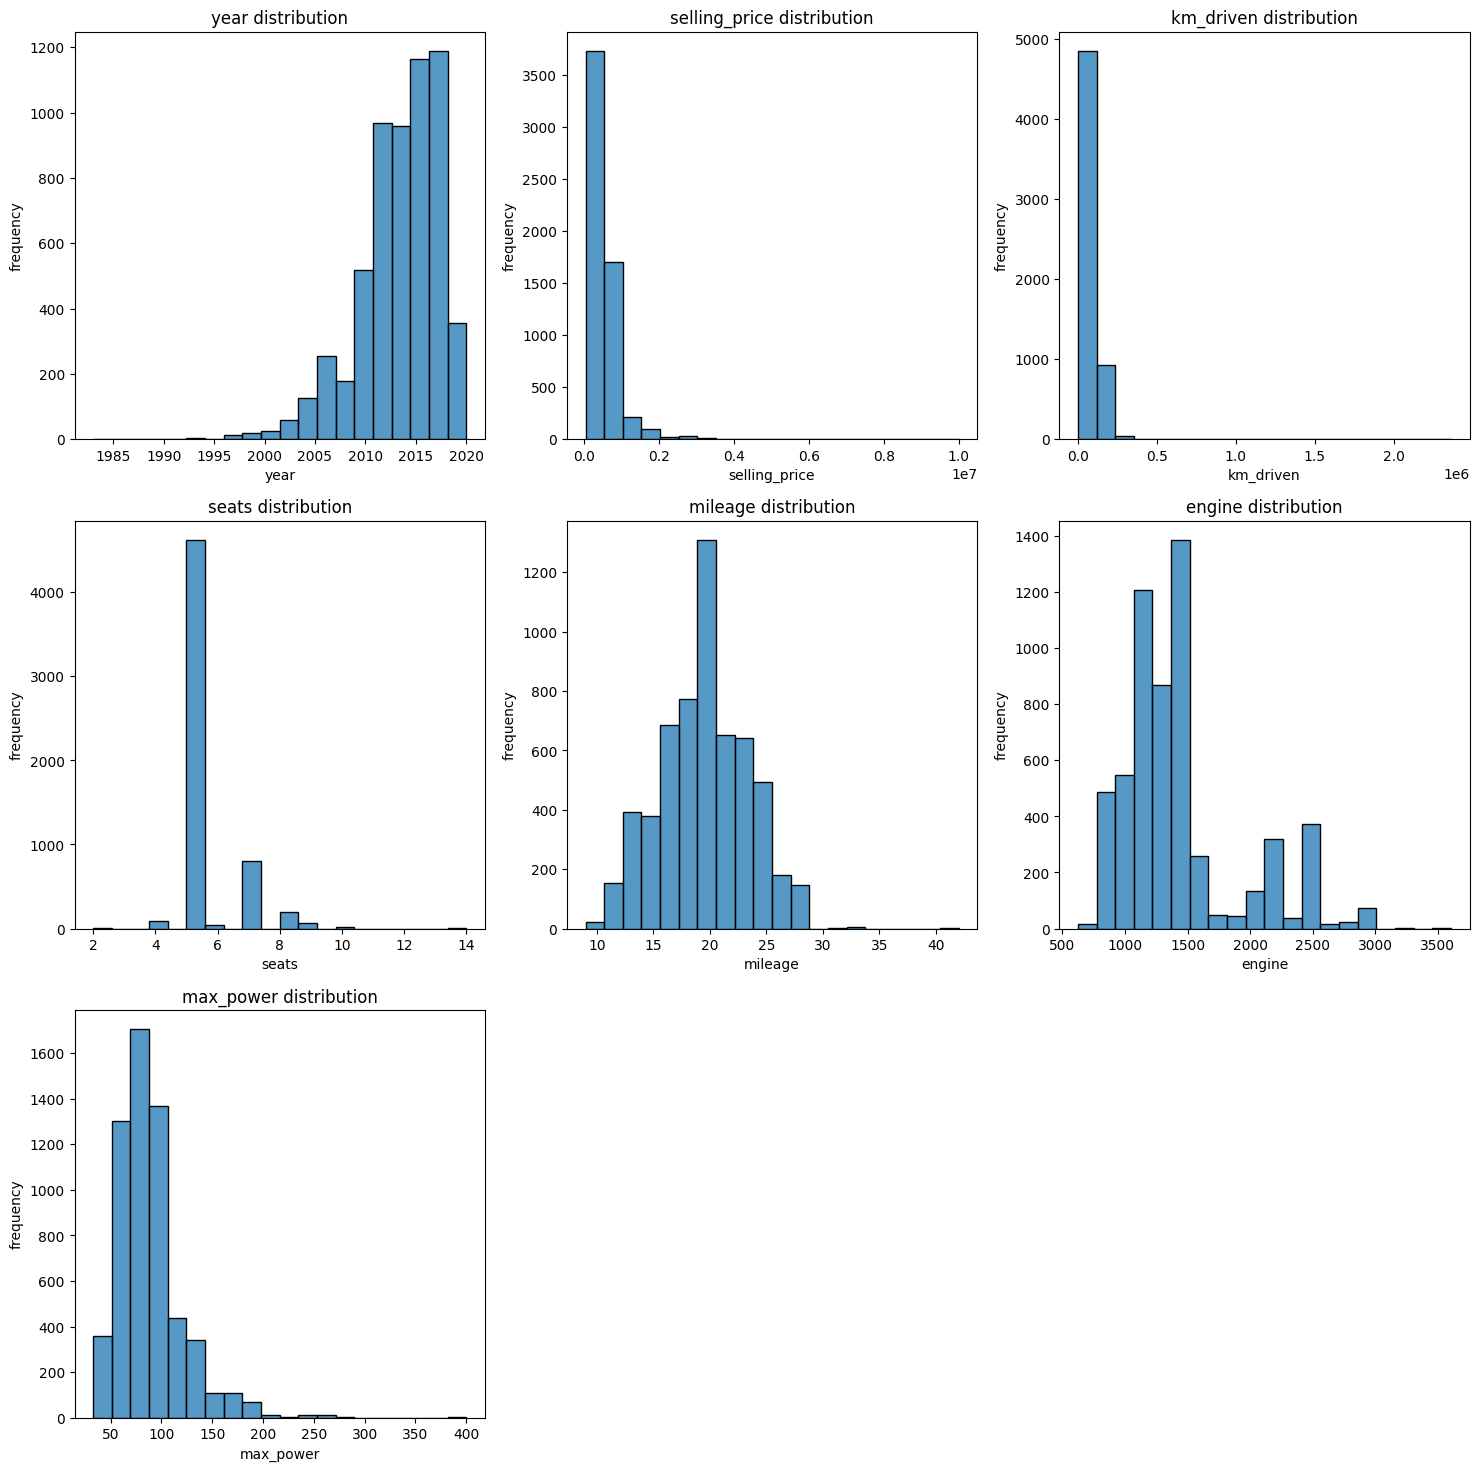

In [ ]:
num_cols = len(numeric_cols)
n_rows = (num_cols + 2) // 3

# сделаем сетку из 3 (n_rows) строк и 3 столбцов
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 18))
axes = axes.flatten()

# нарисуем гистограммы для каждой колонки
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df_train, x=col, bins=20, ax=axes[i])
    sns.color_palette("pastel")
    axes[i].set_title(f'{col} distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('frequency')

# т.к. мы создали сетку 3х3, а графиков - 7, то у нас осталось 2 графика пустых, удалим их
for i in range(num_cols, len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.show()

А теперь посмотрим аналогичные признаки, но уже тестовых данных:

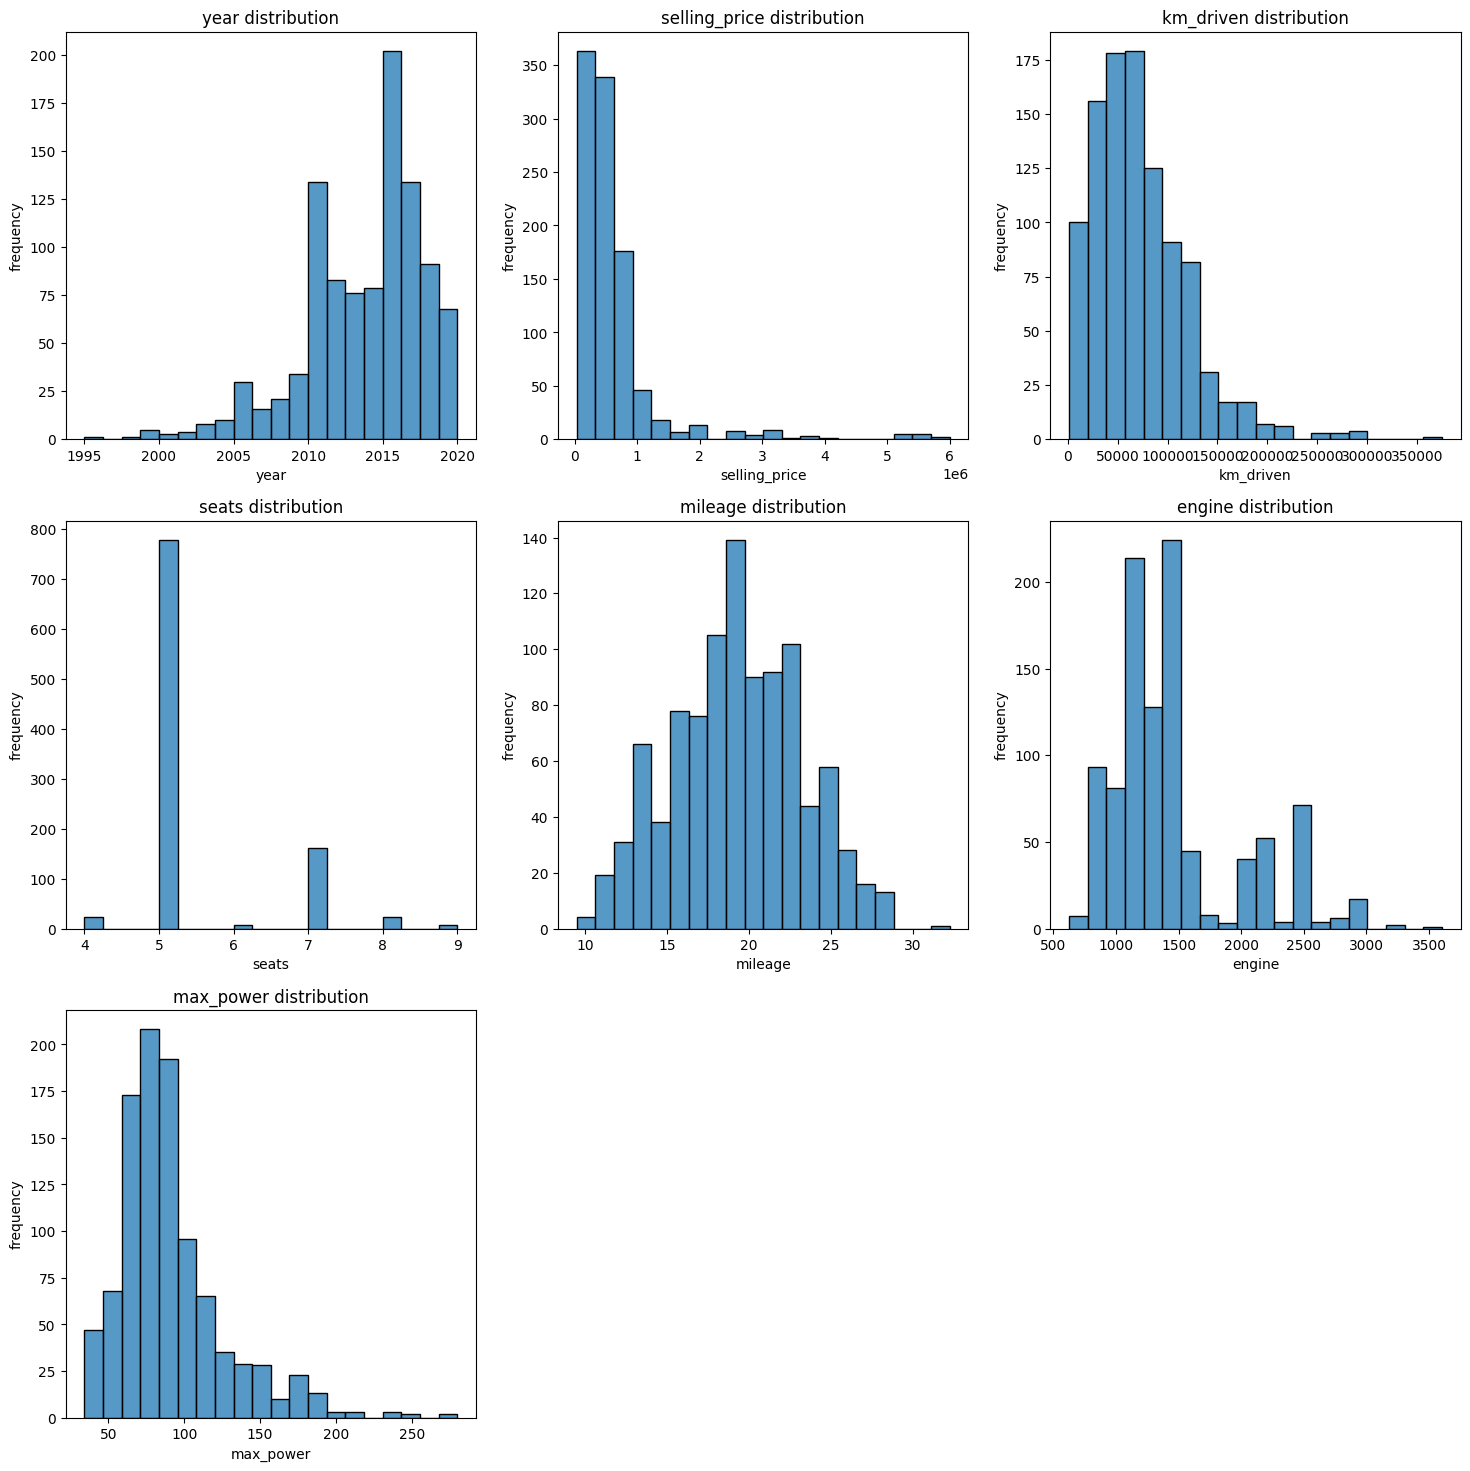

In [ ]:
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 18))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data=df_test, x=col, bins=20, ax=axes[i])
    sns.color_palette("pastel")
    axes[i].set_title(f'{col} distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('frequency')

for i in range(num_cols, len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.show()

Пройдемся по каждому признаку:
- **year** - на тренировочных данных и на тестовых имеем очень схожие распределения, по описательной статистике имеем у *df_train*: mean=2,013.43,  std=4.10,   
 *df_test*: mean=2,013.68, std=4.01  
 Распределения довольно близки  
- **selling_price** - оба распределения имеют левоскошенное распределение. В тренировочных данных есть машины с ценами от 29 тыс. до 10 млн. Цены машин из тестовых данных (от 31 тыс. до 6 млн.) входят в разброс цен тренировочных данных. Также неплохо согласуются средние значения с 1-ым, 2-ым и 3-ым квартилями со std:   
 *df_train*: mean=522 960, 25%=250 000, 50%=405 000, 75%=640 000, std=535 432,       
 *df_test*: mean=758 553, 25%=250 000, 50%=434 999, 75%=670 000, std=758 553;
- **km_driven** - пробег машин в датасетах также имеют схожие распределения:  
 *df_train*: mean=73 952, std=60 071,         
 *df_test*: mean= 71 393, std=48 486;
- **seats** - места в машинах в датасетах также хорошо согласуются:  
 *df_train*: mean=5.43, std=0.98,           
 *df_test*: mean=5.40, std=0.91;
- **mileage** - расход в машинах в датасетах также хорошо согласуются:  
 *df_train*: mean=19.48, std=3.87,             
 *df_test*: mean=19.36, std=3.90;
- **engine** - объемы двигаталей машин в датасетах также схожия значения:
 *df_train*: mean=1436.14, std=484.56,             
 *df_test*: mean=1458.87, std=521.20;
- **max_power** - данные по максимальным мощностям также показывают, что в данных информация о довольно схожих машинах:
 *df_train*: mean=88.26, std=31.56,             
 *df_test*: mean=91.02, std=34.87.

Предварительно можно сказать, что данные, на которых будет обучаться модель, довольно неплохо согласуются с информацией в тестовом датасете, то есть другими словами модель должна увидеть машины с довольно схожими признаками - год выпуска, пробег, мощность и т.д.

__Оценить есть ли явная связь признаков с целевой переменной__:

In [ ]:
df_train[['year', 'selling_price', 'km_driven', 'seats', 'mileage', 'engine',
       'max_power']].corr()

year  selling_price  km_driven  seats  mileage  engine  \
year           1.00           0.43      -0.37   0.04     0.35   -0.02   
selling_price  0.43           1.00      -0.16   0.15    -0.10    0.44   
km_driven     -0.37          -0.16       1.00   0.19    -0.19    0.23   
seats          0.04           0.15       0.19   1.00    -0.48    0.65   
mileage        0.35          -0.10      -0.19  -0.48     1.00   -0.59   
engine        -0.02           0.44       0.23   0.65    -0.59    1.00   
max_power      0.14           0.69       0.03   0.24    -0.39    0.68   

               max_power  
year                0.14  
selling_price       0.69  
km_driven           0.03  
seats               0.24  
mileage            -0.39  
engine              0.68  
max_power           1.00

Наблюдается положительная корреляция между годом выпуска, объемом двигателя и мощностью с целевой переменной. Попробую проинтерпретировать данную корреляцию: машина тем дороже, чем новее год выпуска, здесь кажется всё логично, второе - чем выше показатели двигателя (объем двигателя (engine), мощность (max_power)), т.е. чем она резвее, быстрее, тем машина тоже дороже - здесь также ткажется все довольно складно и логично.

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

__Шаг 1.__

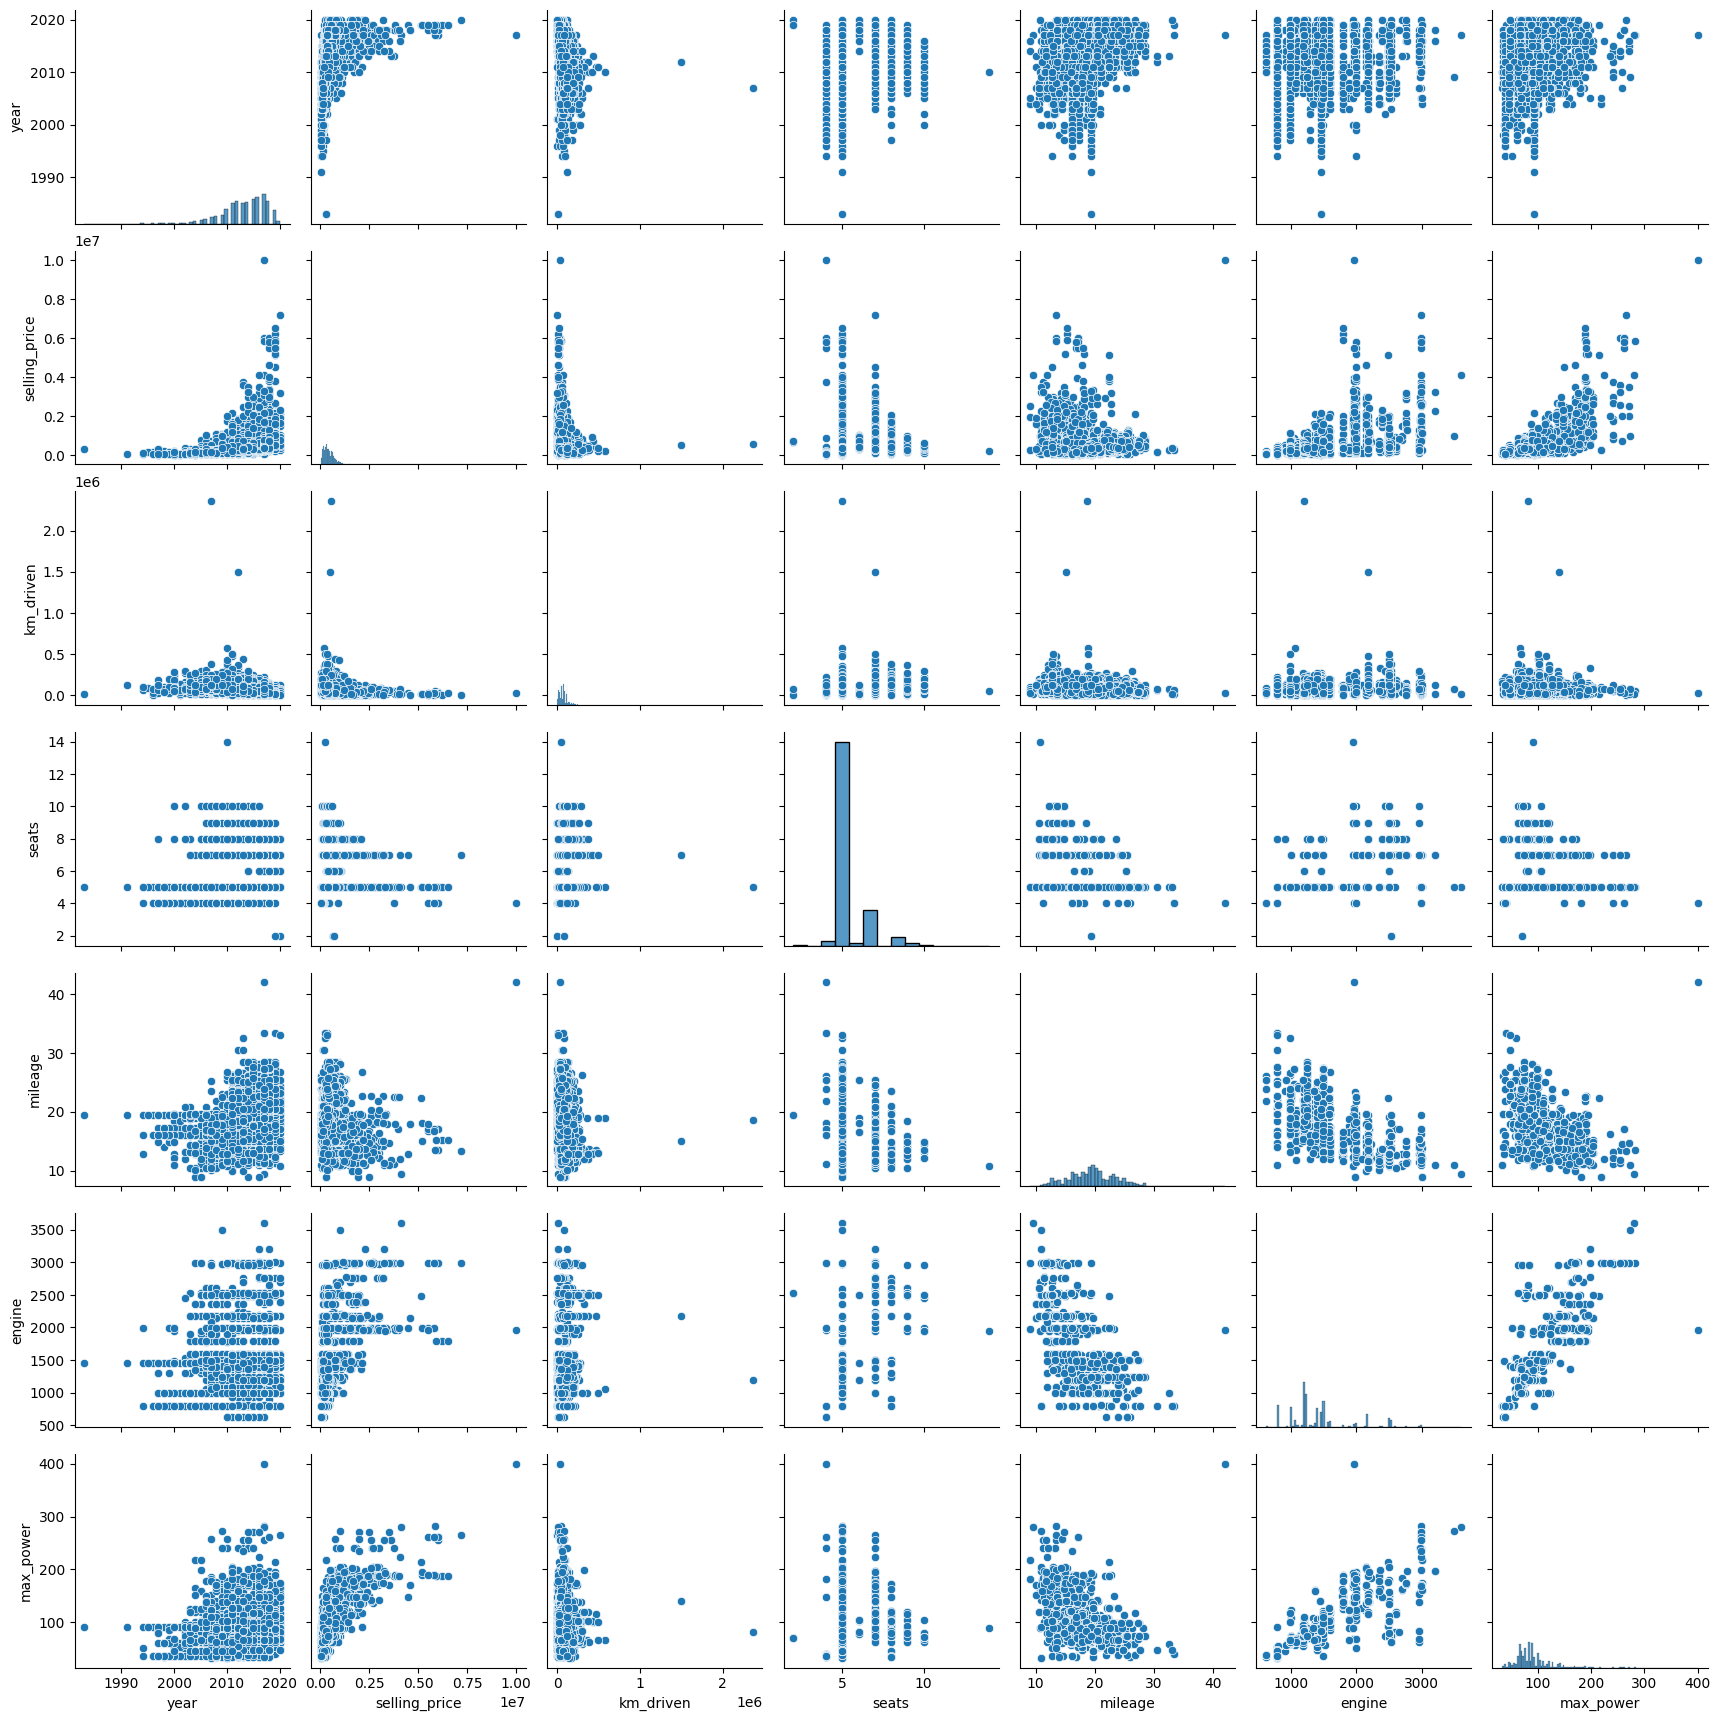

In [ ]:
sns.pairplot(df_train)

__Можно ли предположить на основе распределений связь признаков с целевой переменной?__

Да, можем. Как я уже писал выше, наблюдается связь целевой переменной с характеристиками двигателя (engine, max_power) и годом выпуска машины (year) с целевой переменной.

__Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?__

Да, думаю, что мы можем себе позволить любые гипотезы. Добавлю к вышесказанному, что мне кажется еще должна быть сильная связь с пробегом машины, поскольку больший пробег машины означает, что она подвергалась большему стрессу, а соблюдал ли владелец, скажем, все необходимые рекомандации изготовителя по обслуживанию - это вопрос. Связь не очень большаяя судя по матрице корреляций, возможно это потому, что у нас в наблюдениях имеются выбросы или возможно это связь просто более хитрая, чем линейная.

__Шаг 2.__

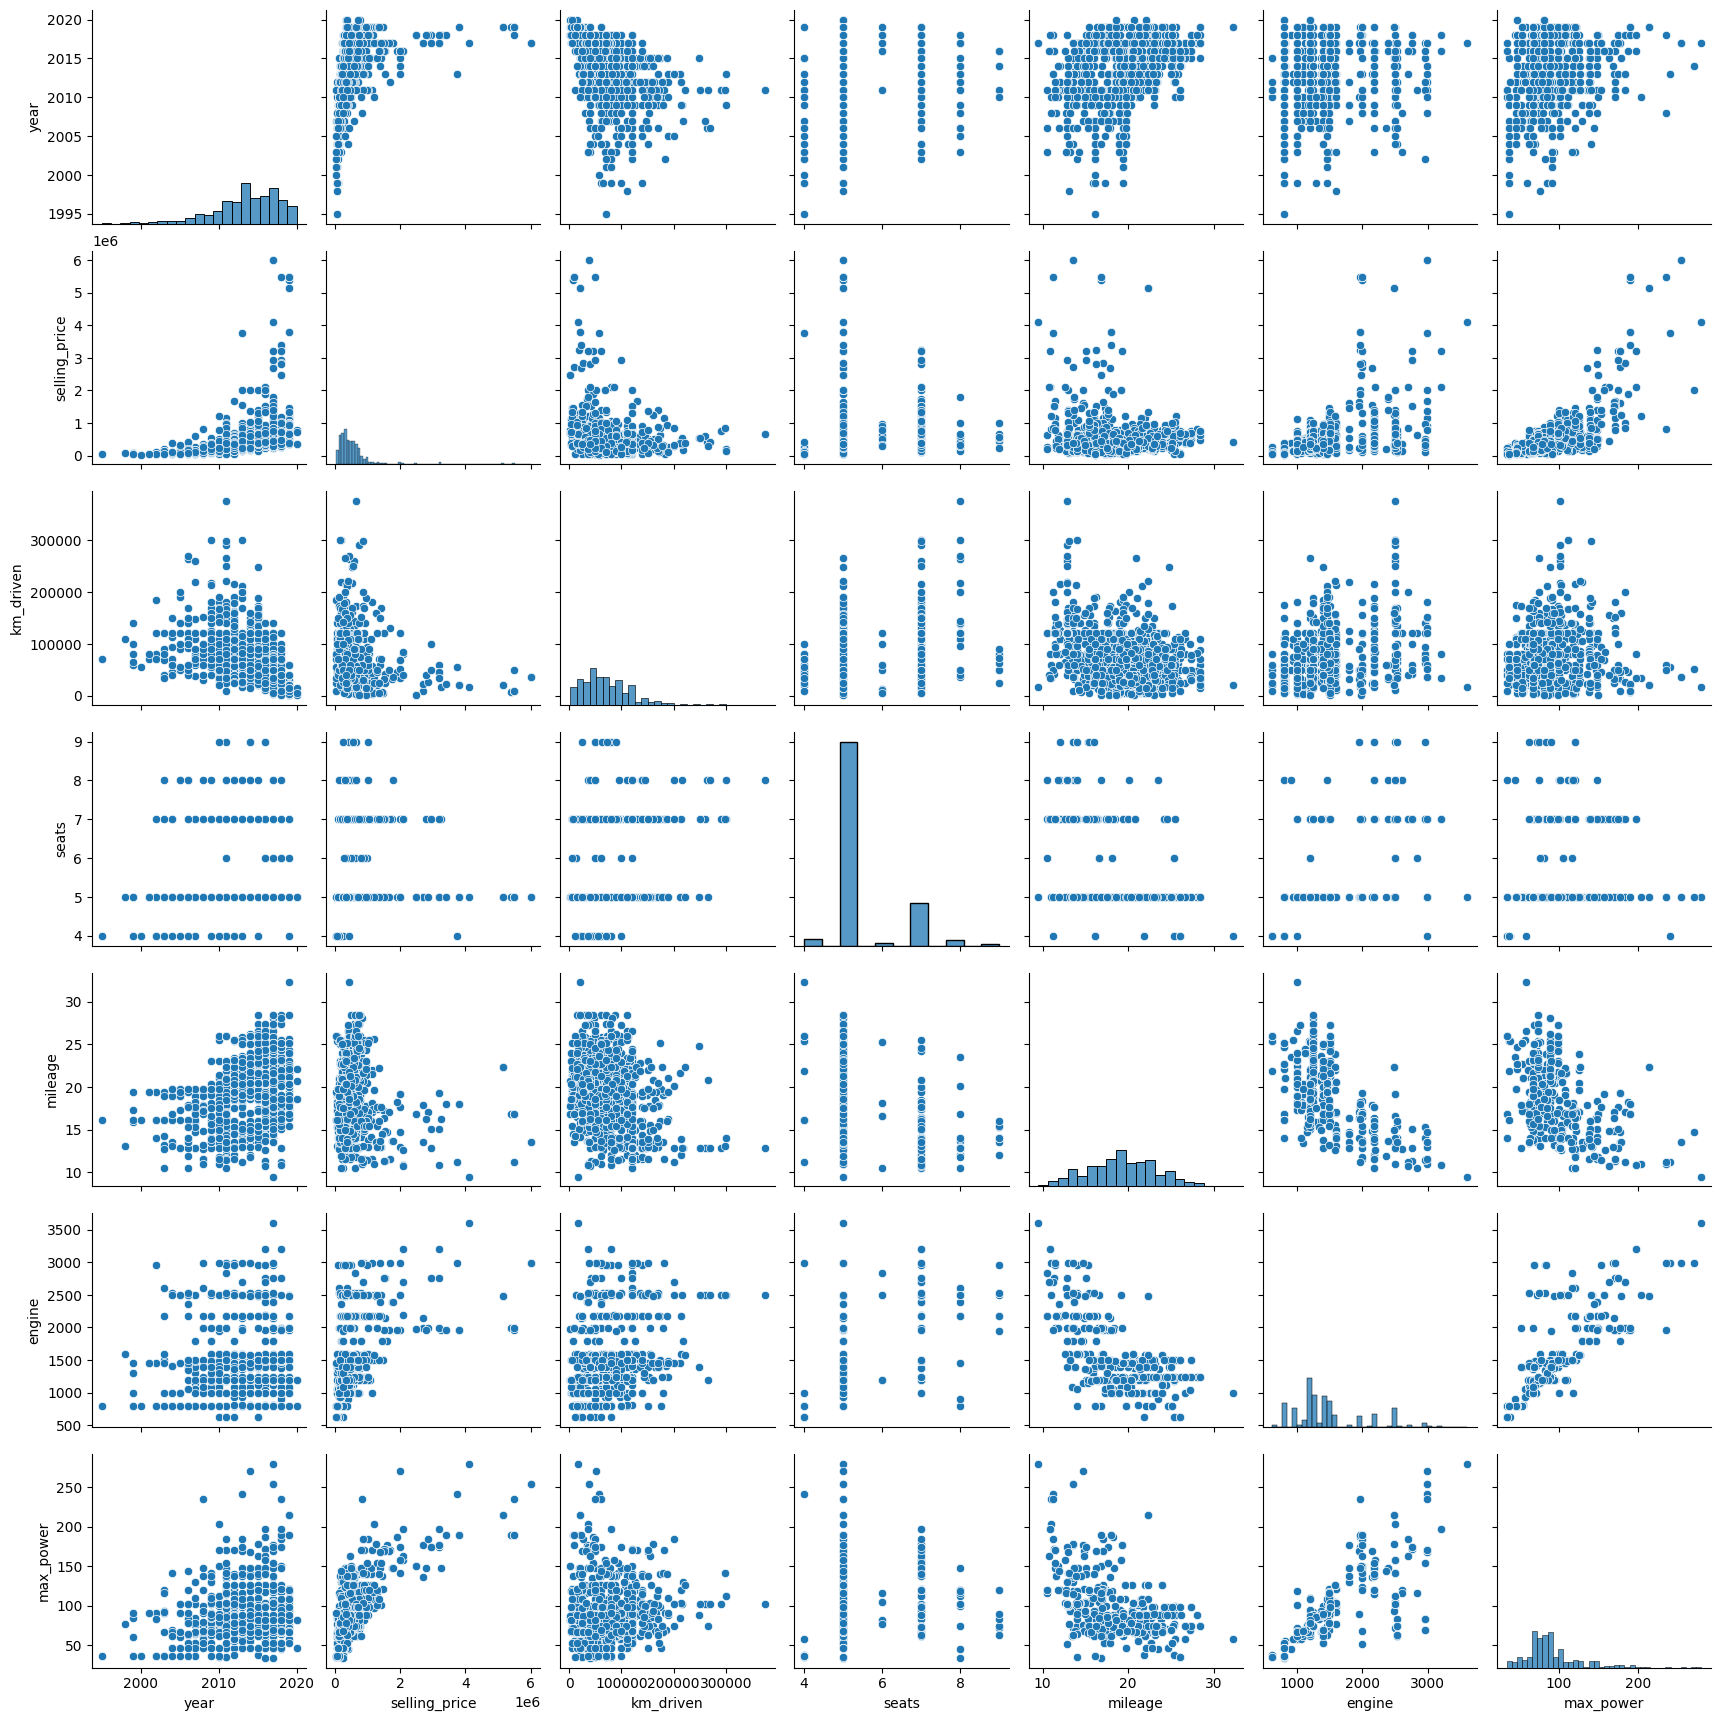

In [ ]:
sns.pairplot(df_test)

__Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"__

Да, как мне кажется, распределения числовых признаков довольно схожи.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


<Axes: >

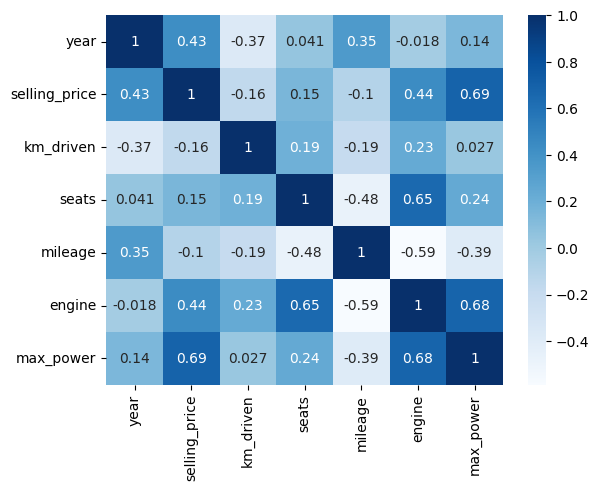

In [ ]:
corr = df_train.corr(numeric_only=True)
sns.heatmap(corr, cmap="Blues", annot=True)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`Your answer here`  
**Какие 2 признака наименее скоррелированы между собой?**  
- Наименее скоррелированными признаками (по модулю) у нас являются *engine* и *year* (-0,018);

**Между какими наблюдается довольно сильная положительная линейная зависимость?**  
- Довольно сильная положительная линейная зависимость у нас наблюдается у признаков max_power и engine (0.68);

**Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?**
- У нас это значение равно -0.37. Да, мы можем сказать, что машины более раннего года выпуска в среднем проезжают больше, но это утверждение не строгое, поскольку есть исключения: условия разные, владельцы авто разные, у которых у их новых авто могут быть огромные пробеги.



### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

In [ ]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

Поскольку наши данные уже разделены на тренировочные и тестовые, давайте просто сохраним отдельно признаки для тренировочных и тестовых данных в переменные X_train и X_test, а целевые переменные для них в y_train и y_test:

In [ ]:
y_train = df_train['selling_price']# your code here
X_train = df_train.select_dtypes(include=['number']).drop(columns='selling_price')# your code here

In [ ]:
assert X_train.shape == (5840, 6)

In [ ]:
y_train.shape

(5840,)

In [ ]:
y_test = df_test['selling_price']# your code here
X_test = df_test.select_dtypes(include=['number']).drop(columns='selling_price')# your code here

In [ ]:
assert X_test.shape == (1000, 6)

In [ ]:
y_test.shape

(1000,)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here
# обучаем модель
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# делаем предсказания на тренировочных и тестовых данных
y_train_predict = model_lr.predict(X_train)
y_test_predict = model_lr.predict(X_test)

In [ ]:
# считаем метрики качества и выводим их:
print(f'''Metrics:
mse_train={MSE(y_train, y_train_predict)}
mse_test={MSE(y_test, y_test_predict)}
R2_train={r2_score(y_train, y_train_predict)}
R2_test={r2_score(y_test, y_test_predict)}
''')

Metrics:
mse_train=116693098176.4231
mse_test=233722857047.14694
R2_train=0.5928908224735653
R2_test=0.5934042337413837



Попробую сделать вывод:  
- Различный почти в 2 раза MSE на тестовых данных полагаю говорит о том, что у нас произошло переобучение, т.е. у модели, скажем, средняя обобщая способность, при этом у нас довольно схожие получились R2, и их значение почти 0,6, а R2 у нас показывает, насколько модель лучше "среднего". Оценка в 0.6 тоже говорит о неком среднем уровне качества модели.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [ ]:
from sklearn.preprocessing import StandardScaler

# your code here
# обучаем объект scaler на тренировочных данных
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
# стандартизируем тренировочные и тестовые данные
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# обучаем модель на тренировочных данных, которые стандартизировали
model_lr.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# делаем предсказания на тренировочных и тестовых данных
y_train_predict2 = model_lr.predict(X_train_scaled)
y_test_predict2 = model_lr.predict(X_test_scaled)

In [ ]:
# считаем метрики качества и выводим их:
print(f'''Metrics:
mse_train={MSE(y_train, y_train_predict2)}
mse_test={MSE(y_test, y_test_predict2)}
R2_train={r2_score(y_train, y_train_predict2)}
R2_test={r2_score(y_test, y_test_predict2)}
''')

Metrics:
mse_train=116693098176.42314
mse_test=233722857047.13986
R2_train=0.5928908224735652
R2_test=0.5934042337413961



### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [ ]:
# your code here
X_train.sample(3)

year  km_driven  seats  mileage  engine  max_power
3913  2012     120000      5    23.50    1498      88.70
1563  2012      50000      5    16.95    1498      97.70
1182  2009      60000      5    17.50    1298      85.80

Выведем коэффициенты (веса):

In [ ]:
b_i = model_lr.coef_
b_i

array([157291.16588195, -43264.63091068, -18842.81595244,  32276.06832782,
        59569.97400455, 323815.55228476])

In [ ]:
bi_df = pd.DataFrame({
    "feature": X_train.columns,
    "abs_coef": np.abs(b_i)})

In [ ]:
bi_df.sort_values(by='abs_coef', ascending=False)

feature   abs_coef
5  max_power 323,815.55
0       year 157,291.17
4     engine  59,569.97
1  km_driven  43,264.63
3    mileage  32,276.07
2      seats  18,842.82

Наиболее информативным в предсказании цены оказался признак *max_power*.

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [ ]:
from sklearn.linear_model import Lasso

# your code here
# обучаем lasso регрессию на нормализованных тренировочных данных
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

Lasso()

In [ ]:
# делаем предсказания на тренировочных и тестовых данных
y_train_predict3 = lasso.predict(X_train_scaled)
y_test_predict3 = lasso.predict(X_test_scaled)

In [ ]:
# считаем метрики качества и выводим их:
print(f'''Metrics:
mse_train={MSE(y_train, y_train_predict3)}
mse_test={MSE(y_test, y_test_predict3)}
R2_train={r2_score(y_train, y_train_predict3)}
R2_test={r2_score(y_test, y_test_predict3)}
''')

Metrics:
mse_train=116693098186.31956
mse_test=233723515419.97617
R2_train=0.5928908224390393
R2_test=0.5934030884036604



Проверим, занулила ли L-1 регуляризация с параметрами по умолчанию какие-нибудь веса:

In [ ]:
# your code here
lasso.coef_

array([157290.83723198, -43263.54423095, -18839.98622272,  32274.30057323,
        59565.23067714, 323816.44200528])

L-1 регуляризация при параметрах по умолчанию (alpha=1) не обнулила никакие веса, возможно это произошло потому, что наши признаки не так слабо связаны между собой и ко всему этому, мы взяли маленький alpha, которого, кажется, оказалось недостаточным, чтобы занулить какие-нибудь веса.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [ ]:
from sklearn.model_selection import GridSearchCV

# your code here

In [ ]:
# зададим варианты гиперпараметра alpha, который будем поочереди применять на модели:
params = {'alpha' : [1, 250, 500, 750, 1000, 2000]}

In [ ]:
# подберем гиперпараметры по кросс-валидации
lasso = GridSearchCV(lasso, params, scoring='neg_mean_squared_error', cv=10)
lasso.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1, 250, 500, 750, 1000, 2000]},
             scoring='neg_mean_squared_error')

Выведем слева-направо:  
- лучший score на кросс-валидации, т.е. при каком наборе гиперпараметров у нас получился наилучший score;  
- модель с наилучшим alpha;  
- лучшее значение параметра alpha.

In [ ]:
-lasso.best_score_, lasso.best_estimator_, lasso.best_params_

(121149103527.24707, Lasso(alpha=1000), {'alpha': 1000})

Посмотрим на коэффициенты (веса) модели с наилучшими параметрами:

In [ ]:
lasso.best_estimator_.coef_

array([156987.23527326, -42177.07317713, -16062.78134138,  30497.55265502,
        54887.27855388, 324668.191492  ])

- Грид-сёрчу пришлось обучать количество фолдов (cv) помноженное на количество параметров alpha: cv * alpha = 10 * 6 = 60;  
- Лучший коэффициент регуляризации оказался alpha = 1000. Никакие веса не занулились.

In [ ]:
# делаем предсказания на тренировочных и тестовых данных
y_train_predict4 = lasso.predict(X_train_scaled)
y_test_predict4 = lasso.predict(X_test_scaled)

In [ ]:
# считаем метрики качества и выводим их:
print(f'''Metrics:
mse_train={MSE(y_train, y_train_predict4)}
mse_test={MSE(y_test, y_test_predict4)}
R2_train={r2_score(y_train, y_train_predict4)}
R2_test={r2_score(y_test, y_test_predict4)}
''')

Metrics:
mse_train=116702821134.25299
mse_test=234387933625.03818
R2_train=0.5928569018267823
R2_test=0.5922472338474718



**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [ ]:
from sklearn.linear_model import ElasticNet

# your code here

In [ ]:
# зададим варианты гиперпараметров alpha и l1_ratio, которые будем поочереди применять на модели:
params2 = {'alpha': [1, 250, 500, 1000],
           'l1_ratio': [0.1, 0.25, 1, 10]}

In [ ]:
elastic_net = ElasticNet(random_state=42)

In [ ]:
# подберем гиперпараметры по кросс-валидации
el_net = GridSearchCV(elastic_net, params2, cv=10)
el_net.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

GridSearchCV(cv=10, estimator=ElasticNet(random_state=42),
             param_grid={'alpha': [1, 250, 500, 1000],
                         'l1_ratio': [0.1, 0.25, 1, 10]})

In [ ]:
el_net.best_score_, el_net.best_estimator_, el_net.best_params_

(0.569262413164847,
 ElasticNet(alpha=1000, l1_ratio=1, random_state=42),
 {'alpha': 1000, 'l1_ratio': 1})

- Грид-сёрчу пришлось обучать количество фолдов (cv) помноженное на количество параметров alpha и на число параметров l1_ratio: cv * alpha * l1_ratio = 10 * 4 * 4 = 160;  
- Лучшими гиперпараметрами получились alpha = 1000 и l1_ratio = 1.

In [ ]:
# делаем предсказания на тренировочных и тестовых данных
y_train_predict5 = el_net.predict(X_train_scaled)
y_test_predict5 = el_net.predict(X_test_scaled)

In [ ]:
# считаем метрики качества и выводим их:
print(f'''Metrics:
mse_train={MSE(y_train, y_train_predict5)}
mse_test={MSE(y_test, y_test_predict5)}
R2_train={r2_score(y_train, y_train_predict5)}
R2_test={r2_score(y_test, y_test_predict5)}
''')

Metrics:
mse_train=116702821134.25299
mse_test=234387933625.03818
R2_train=0.5928569018267823
R2_test=0.5922472338474718



# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [ ]:
# your code here
X_train_cat = df_train.drop(columns=['name', 'selling_price'], axis=1)
X_test_cat = df_test.drop(columns=['name', 'selling_price'], axis=1)

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [ ]:
assert X_train_cat.shape == (5840, 10)

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [ ]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here

In [ ]:
X_train_cat['seats'] = X_train_cat['seats'].astype(str)
X_train_cat.describe(include='object')

X_test_cat['seats'] = X_test_cat['seats'].astype(str)
X_test_cat.describe(include='object')

fuel seller_type transmission        owner seats
count     1000        1000         1000         1000  1000
unique       4           3            2            5     6
top     Diesel  Individual       Manual  First Owner     5
freq       534         837          877          623   777

Воспользуемся OneHotEncoder из библиотеки sklearn:

In [ ]:
X_train_cat.head(1)

year  km_driven    fuel seller_type transmission        owner seats  \
0  2014     145500  Diesel  Individual       Manual  First Owner     5   

   mileage  engine  max_power  
0    23.40    1248      74.00

In [ ]:
X_train_cat.columns

Index(['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
       'seats', 'mileage', 'engine', 'max_power'],
      dtype='object')

In [ ]:
one_hot_enc = OneHotEncoder(drop='first', handle_unknown='ignore')

Запишем категориальные признаки:

In [ ]:
cat_features = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']

Обучим и преобразуем тренировочные данные:

In [ ]:
encoded_train = one_hot_enc.fit_transform(X_train_cat[cat_features]).toarray()

Преобразуем тестовые данные:

In [ ]:
encoded_test = one_hot_enc.transform(X_test_cat[cat_features]).toarray()

Создадим датафреймы для закодированных признаков:

In [ ]:
encoded_train_df = pd.DataFrame(encoded_train,
                                columns=one_hot_enc.get_feature_names_out(cat_features),
                                index=X_train_cat.index)

In [ ]:
encoded_test_df = pd.DataFrame(encoded_test,
                              columns=one_hot_enc.get_feature_names_out(cat_features),
                              index=X_test_cat.index)

Дропнем исходные категориальные признаки:

In [ ]:
X_train_encoded = pd.concat([X_train_cat.drop(columns=cat_features), encoded_train_df], axis=1)
X_test_encoded = pd.concat([X_test_cat.drop(columns=cat_features), encoded_test_df], axis=1)

In [ ]:
X_train_encoded.shape

(5840, 23)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here

In [ ]:
# зададим варианты гиперпараметра alpha, который будем поочереди применять на модели:
params = {'alpha' : [0.001, 0.01, 1, 10, 100, 1000]}

In [ ]:
ridge_model = Ridge(random_state=42)

In [ ]:
# подберем гиперпараметры по кросс-валидации
ridge = GridSearchCV(ridge_model, params, scoring='r2', cv=10)
ridge.fit(X_train_encoded, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.05741e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


GridSearchCV(cv=10, estimator=Ridge(random_state=42),
             param_grid={'alpha': [0.001, 0.01, 1, 10, 100, 1000]},
             scoring='r2')

In [ ]:
# делаем предсказания на тренировочных и тестовых данных
y_train_predict6 = ridge.predict(X_train_encoded)
y_test_predict6 = ridge.predict(X_test_encoded)

In [ ]:
# считаем метрики качества и выводим их:
print(f'''Metrics:
mse_train={MSE(y_train, y_train_predict6)}
mse_test={MSE(y_test, y_test_predict6)}
R2_train={r2_score(y_train, y_train_predict6)}
R2_test={r2_score(y_test, y_test_predict6)}
''')

Metrics:
mse_train=98841073339.42087
mse_test=203832131341.38846
R2_train=0.6551714822739051
R2_test=0.645403608881263



Прошлые показатели:  
mse_train5=116702821134.25299   
mse_test5=234387933625.03818    
R2_train5=0.5928569018267823  
R2_test5=0.5922472338474718

Модель наконец улучшилась! MSE, который мы минимизируем - уменьшился, а R2, который чем ближе к 1, тем лучше, увеличился!

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [ ]:
def business_metric(y_true, y_pred):
    # your code here
    # истинные значения и значения прогнозов превратим в numpy массивы
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # здесь если модуль разности numpy массивов не превышает 0.1 (10%), то возвращается True
    no_more_10_prcnt = np.abs((y_pred - y_true) / y_true) <= 0.1

    # тут считаем сумму по всем true, полученных выше и делим на число всех наблюдений, для которых считаем метрику
    return np.sum(no_more_10_prcnt) / len(y_true)

Запишем наши модели в словарь:

In [ ]:
models = {"LinearRegression": model_lr,
          "Lasso": lasso,
          "ElasticNet": el_net,
          "Ridge": ridge}

Пройдем в цикле по моделям на данных, на которых делали прогнозы выше в заданиях, и выведем для каждой значение нашей метрики для тренировочных и тестовых данных:

In [ ]:
for model_name, model in models.items():

    if model_name == 'LinearRegression':
        y_train_predict = model.predict(X_train)
        y_test_predict = model.predict(X_test)
    elif model_name == 'Lasso':
        y_train_predict = model.predict(X_train_scaled)
        y_test_predict = model.predict(X_test_scaled)
    elif model_name == 'ElasticNet':
        y_train_predict = model.predict(X_train_scaled)
        y_test_predict = model.predict(X_test_scaled)
    elif model_name == 'Ridge':
        y_train_predict = model.predict(X_train_encoded)
        y_test_predict = model.predict(X_test_encoded)

    train_metric = business_metric(y_train, y_train_predict)
    test_metric = business_metric(y_test, y_test_predict)

    print(f"{model_name}:")
    print(f"Business metric (train): {train_metric:.3f}")
    print(f"Business metric (test): {test_metric:.3f}", end='\n\n')


LinearRegression:
Business metric (train): 0.209
Business metric (test): 0.216

Lasso:
Business metric (train): 0.209
Business metric (test): 0.217

ElasticNet:
Business metric (train): 0.209
Business metric (test): 0.217

Ridge:
Business metric (train): 0.212
Business metric (test): 0.243



`Your answer here`  
Лучше всех себя проявила модель Ridge. Попробую объяснить почему это произошло. Мы добавили в модель категориальные признаки, которые несут в себе полезную информацию и это помогло модели лучше понять и объяснить данные.

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import pickle
import uvicorn
import os
from sklearn.linear_model import Ridge
import fastapi
from fastapi.responses import StreamingResponse
import io
from fastapi import File, UploadFile, HTTPException


app = FastAPI()

class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float

class Items(BaseModel):
    objects: List[Item]

# Подгружаю pickle для своей лучшей модели
model_path = os.path.join(os.path.dirname(__file__), "model.pkl")
with open(model_path, 'rb') as model_file:
    loaded_model = pickle.load(model_file)
# Подгружаю pickle для ohe
ohe_path = os.path.join(os.path.dirname(__file__), "one_hot_enc.pkl")
with open(ohe_path, 'rb') as ohe_file:
    ohe = pickle.load(ohe_file)

# Функция, которая служит для предобработки исходных данных
def preprocess_data(data):
    data = data.drop(columns=['torque', 'selling_price', 'name'], axis=1)
    data['mileage'] = data['mileage'].apply(lambda x: float(str(x).split(' ')[0]) if x != None else None)
    data['engine'] = data['engine'].apply(lambda x: float(str(x).split(' ')[0]) if x != None else None)
    data['max_power'] = data['max_power'].apply(lambda x: float(str(x).split(' ')[0]) if x != None else None)
    data['seats'] = data['seats'].astype(int)
    data['seats'] = data['seats'].astype(str)

    cat_features = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']

    encoded = ohe.transform(data[cat_features]).toarray()
    encoded_df = pd.DataFrame(encoded,
                              columns=ohe.get_feature_names_out(cat_features),
                              index=data.index)

    car_encoded = pd.concat([data.drop(columns=cat_features), encoded_df], axis=1)
    return car_encoded#car_encoded

@app.get("/")
async def root():
    return {
        "Name": "Car price prediction",
        "Description": "This is a model for predicting the price of a car based on its characteristics.."
    }

# Делаем предсказание для одной машины и выводим целевую переменную -
@app.post("/predict_item")
def predict_item(item: Item):# -> float:
    item = item.dict()
    item = pd.DataFrame(item, index=[0])
    processed_data = preprocess_data(item)
    prediction = loaded_model.predict(processed_data)
    return round(float(prediction[0]), 2)

# Делаем предсказания для списка машин и выгружаем csv
@app.post("/predict_items/")
def predict_items(file: UploadFile = File(...)):
    try:
        data = file.file.read()
        df = pd.read_csv(io.BytesIO(data))

        processed_data = preprocess_data(df)
        predictions = loaded_model.predict(processed_data)
        df['predicted_price'] = predictions

        output = io.StringIO()
        df.to_csv(output, index=False)
        output.seek(0)

        return StreamingResponse(
            output,
            media_type="text/csv",
            headers={"Content-Disposition": "attachment; filename=predictions.csv"}
        )
    except Exception:
        raise HTTPException(status_code=500, detail='Something went wrong')
    finally:
        file.file.close()

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

